# Analyzing Stocks with Python

**Problem Statement:** You are a financial analyst who is interested in analyzing the stock market. You have been given a dataset of stock prices for the last 8 years. You want to analyze the stock market and find out which stocks are the best to invest in. For this, you will use Python to analyze the stock market.

#### Importing the libraries

In [173]:
import basic.basic_functions as bf #custom functions library
import pandas as pd #data analysis library
import numpy as np #numerical library
from pandas_datareader.data import DataReader  #data reader library
from datetime import date #date library
from pathlib import Path #path library
import os  #operating system library
import sys #system library
import requests #request library

import basic.basic_functions as bf #custom functions library

import matplotlib.pyplot as plt #plotting library
import seaborn as sns #plotting library
import plotly.express as px #plotting library
import plotly.graph_objects as go # Using graph_objects
from plotly.subplots import make_subplots


import statsmodels.api as sm #statsmodels library

IEX_API_KEY = os.getenv('IEX_API_KEY')

import warnings
warnings.filterwarnings('ignore')

In [174]:
import statsmodels.api as sm # to perform statistical operations specifically on linear regression
from  statsmodels.tsa.stattools import acf # to perform statistical operations specifically on time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # to plot ACF and PACF plots
from statsmodels.tsa.stattools import adfuller # to perform dickey fuller test for stationarity of time series
from statsmodels.tsa.arima_process import ArmaProcess # to generate ARMA processes
from statsmodels.tsa.arima.model import ARIMA # to perform ARIMA modelling
from statsmodels.graphics.tsaplots import plot_predict # to plot the prediction of ARIMA model

In [175]:
# Set the plot style
plt.style.use('ggplot')

#### Importing the dataset

In [176]:
# Set the start and end date
start = date(2015, 1, 1)
end = date.today()
tickers = ['AAPL', 'TSLA', 'GOOGL','MSFT']
data_source = 'iex'
# Import the stock prices
stock_prices = pd.DataFrame()
for ticker in tickers:
    stock_price = DataReader(ticker, data_source, start, end, api_key=IEX_API_KEY)
    stock_price['Ticker'] = ticker
    stock_prices = pd.concat([stock_prices, stock_price])
    
stock_prices = stock_prices.reset_index()
stock_prices['date'] = pd.to_datetime(stock_prices['date'])
stock_prices.set_index('date', inplace=True)
stock_prices.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8302 entries, 2015-01-02 to 2023-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    8302 non-null   float64
 1   high    8302 non-null   float64
 2   low     8302 non-null   float64
 3   close   8302 non-null   float64
 4   volume  8302 non-null   float64
 5   Ticker  8302 non-null   object 
dtypes: float64(5), object(1)
memory usage: 454.0+ KB


In [177]:
# Set the start and end date
start = date(2015, 1, 1)
end = date.today()
tickers = ['SP500']
data_source = 'fred'
# Import the stock prices
indices = pd.DataFrame()
for index in tickers:
    index_data = DataReader(index, data_source, start, end, api_key=IEX_API_KEY)
    # index_data['Ticker'] = index
    indices = pd.concat([indices, index_data])
    
indices = indices.reset_index()
indices['DATE'] = pd.to_datetime(indices['DATE'])
indices.rename(columns={'DATE':'date'}, inplace=True)
indices.set_index('date', inplace=True)
indices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2152 entries, 2015-01-01 to 2023-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2076 non-null   float64
dtypes: float64(1)
memory usage: 33.6 KB


## Exploratory Data Analysis

Before we can do anything we will perform some basic data analysis. The following are some basic questions that we will try to answer:

1. What is the average price of the stock?
2. What is the maximum and minimum price of the stock?
3. What is the moving average of the various stocks?
4. What is the daily return of the stock?
5. What is the correlation between different stocks' closing prices?

These are some of the standard steps to perform exploratory data analysis and data preprocessing.

1. Check Data [rows, columns, data types]
2. Check for unnecessary columns and remove them
3. Check for unique values in each column
4. Check summary statistics
5. Check for duplicate rows
6. Quantifying data

In [178]:
# 1. Check the shape of the data and the data types of the columns
print(f"The data has {stock_prices.shape[0]} rows and {stock_prices.shape[1]} columns") 
print(f"The data has {indices.shape[0]} rows and {indices.shape[1]} columns",'\n')

The data has 8302 rows and 6 columns
The data has 2152 rows and 1 columns 



In [179]:
# 2. Check for missing values
print(f"Missing values in stock_prices: {stock_prices.isnull().sum().sum()}")
print(f"Missing values in indices: {indices.isnull().sum().sum()}",'\n')

Missing values in stock_prices: 0
Missing values in indices: 76 



### Visualizing the data

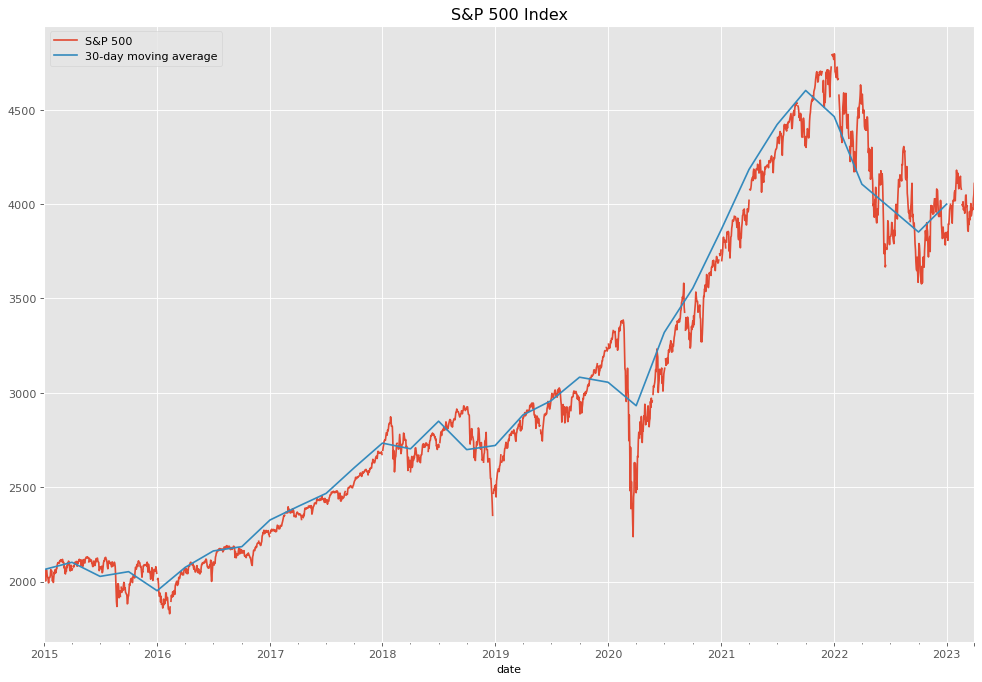

In [180]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=80)
indices.plot(ax=ax)
indices.resample('Q').mean().plot(ax=ax)
plt.title('S&P 500 Index')
plt.legend(['S&P 500', '30-day moving average'])
plt.show()

We can notice by zooming out that there is an upward trend in the index prices and that they are not stationary.